# MESA session 3: solution notebook


In [5]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt 
import astropy.units as u
import astropy.constants as const



***
# Problem 1 Energy production in massive stars

In [18]:

#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0, Lfrac = True,
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = './plots/'):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        # ZAMS_i = next(ind for ind,x in enumerate(hist.center_h1) if x < 0.69)
        # hist = hist[ZAMS_i:]
    
        #Express the luminosity as a fraction of the total luminosity
        if Lfrac:
            print('making L frc', min(hist.colour_by), max(hist.colour_by))
            hist_L_frac = np.zeros(len(hist.colour_by))
            hist_L_frac = (10**hist.colour_by)/(10**hist.log_L)
            kleur = 'L_frac'
            
        ##plot lines
        scat = ax.scatter(hist.log_Teff,  hist.log_L , label= hist_names[i],
                c = hist[kleur], vmin= VMIN, vmax = VMAX)
        ax.scatter(hist.log_Teff[0],  hist.log_L[0] , marker = '*') #log_Teff
        ax.text(hist.log_Teff[0],  hist.log_L[0] , hist_names[i], ha='right', va='top') #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist.log_Teff)-2, max(hist.log_Teff)+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-60, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    cb = fig.colorbar(scat, ax=ax)
    cb.set_label(colour_by.replace('_', ' '), size = 25)
    cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=20)
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
#     plt.legend( )
    plt.savefig(save_loc +'/HR_'+colour_by+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt

# assumes const_Rlines(log_Ts, logr) is defined elsewhere

def HR_diagram(histoy_list, xlim=(None, None), ylim=(None, None),
               VMIN=-3, VMAX=0, Lfrac=False,
               colour_by='center_h1', colour_label='kleur',
               save_loc='./plots/', names=None, dpi=200):

    fig, ax = plt.subplots(figsize=(12, 8))
    all_teff, scat = [], None

    for i, hist in enumerate(histoy_list):
        log_Teff = np.asarray(getattr(hist, 'log_Teff'))
        log_L    = np.asarray(getattr(hist, 'log_L'))
        C        = np.asarray(getattr(hist, colour_by))

        if Lfrac:
            # e.g. colour_by='log_LH' -> 10**log_LH / 10**log_L = L_H / L_tot
            C = np.power(10.0, C) / np.power(10.0, log_L)

        # label: prefer provided names; else fall back to global hist_names if present; else generic
        try:
            label = (names[i] if names and i < len(names) else
                     (hist_names[i] if 'hist_names' in globals() and i < len(hist_names) else
                      f"track {i+1}"))
        except Exception:
            label = f"track {i+1}"

        scat = ax.scatter(log_Teff, log_L, c=C, vmin=VMIN, vmax=VMAX, s=8, label=label)
        ax.scatter(log_Teff[0], log_L[0], marker='*', s=40)
        ax.text(log_Teff[0], log_L[0], label, ha='right', va='top', fontsize=9)
        all_teff.append(log_Teff)

    cb = plt.colorbar(scat, ax=ax)
    cb.set_label(colour_label if colour_label else (f"{colour_by} / L" if Lfrac else colour_by))

    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    ax.set_ylabel('log$_{10}$(L/L$_{\\odot}$)')
    if xlim != (None, None): ax.set_xlim(xlim)
    if ylim != (None, None): ax.set_ylim(ylim)
    ax.invert_xaxis()
    fig.tight_layout()

    os.makedirs(save_loc, exist_ok=True)
    out = os.path.join(save_loc, f"HR_{'Lfrac_'+colour_by if Lfrac else colour_by}.png")
    plt.savefig(out, bbox_inches='tight', dpi=dpi)
    plt.show(); plt.close()
    return out


In [36]:
history15 = mr.MesaData('./data/hw4_models/M15_HW4/history.data')
history20 = mr.MesaData('./data/hw4_models/M20_HW4/history.data')
history30 = mr.MesaData('./data/hw4_models/M30_HW4/history.data')
history40 = mr.MesaData('./data/hw4_models/M20_HW4/history.data')
history60 = mr.MesaData('./data/hw4_models/M40_HW4/history.data')


In [37]:
history15.header_names
history15.version_number

10398

In [38]:
histoy_list = [history15, history20, history30, history40, history60]
HistNameList   = ['15 M$_{\odot}$', '20 M$_{\odot}$', '30 M$_{\odot}$', '40 M$_{\odot}$', '60 M$_{\odot}$']
colors = plt.cm.plasma(np.linspace(0,1,4)) #3rd num is the number of colours Set2

## H, He and Z luminosity as a fraction of the total L

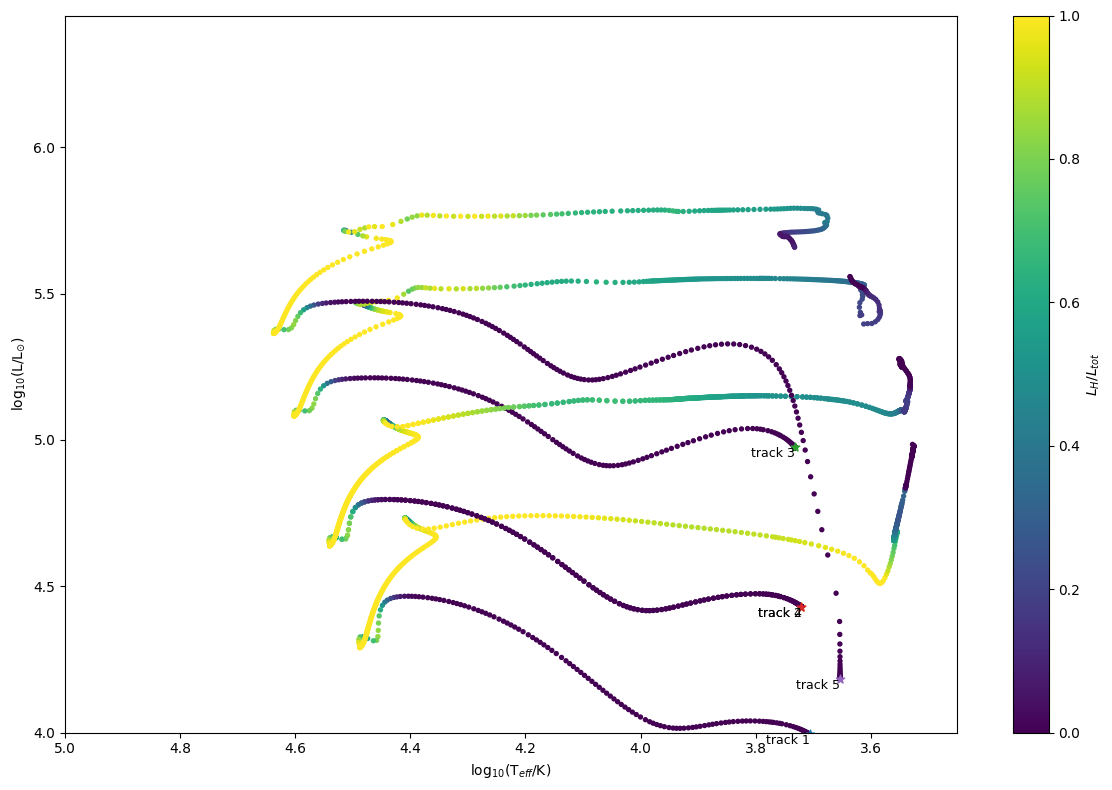

'./plots/HR_Lfrac_log_LH.png'

In [39]:
HR_diagram(histoy_list,
           xlim=(3.45, 5.0), ylim=(4.0, 6.45),
           VMIN=0, VMAX=1, Lfrac=True,
           colour_by='log_LH', colour_label='$L_{H}$/$L_{tot}$')


In [ ]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.45), VMIN =0, VMAX = 1, Lfrac = True,
           colour_by = 'log_LH', colour_label = '$L_{H}$/$L_{tot}$')


TypeError: HR_diagram() got an unexpected keyword argument 'VMIN'

making L frc -29.074070900138054 5.628384168084629
making L frc -28.068566029896225 7.569505587762254
making L frc -26.850479198665255 8.420592075608694
making L frc -26.114112251887303 8.900166127344269
making L frc -25.22713928724684 9.540534417856833


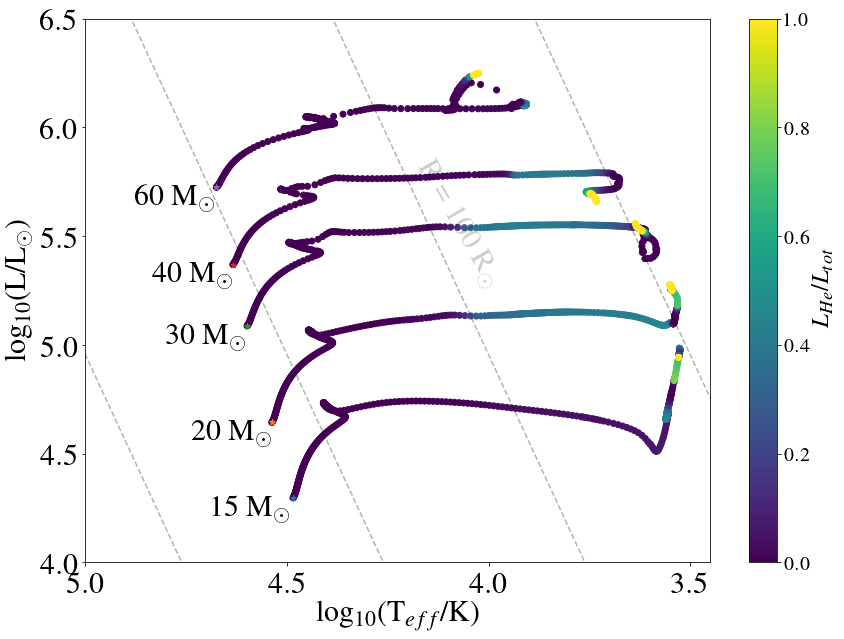

In [ ]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =0, VMAX = 1, Lfrac = True,
           colour_by = 'log_LHe', colour_label = '$L_{He}$/$L_{tot}$')

making L frc -98.99999999999999 8.227629784377665
making L frc -98.99999999999999 8.734696063358445
making L frc -98.99999999999999 9.71397515879523
making L frc -98.99999999999999 10.208368634159818
making L frc -98.99999999999999 11.679350830830007


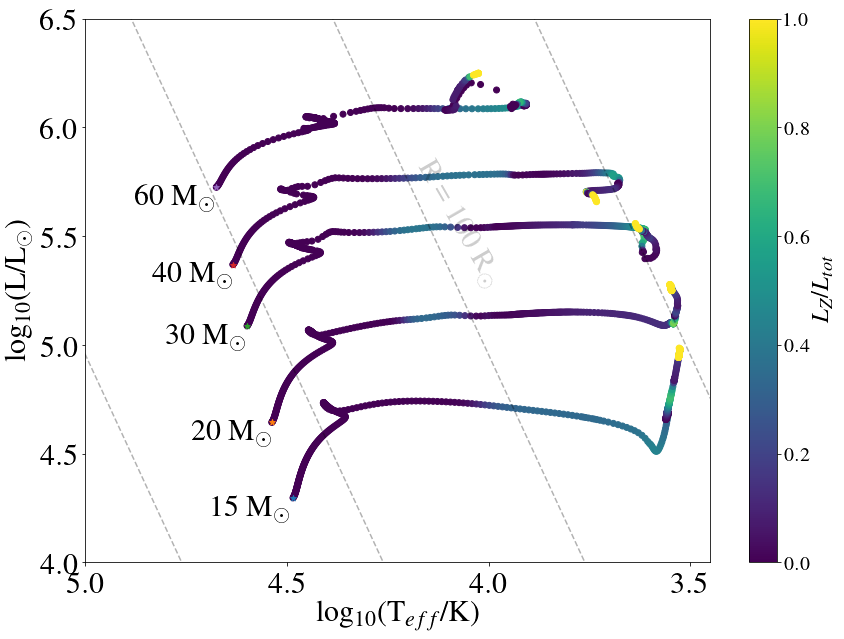

In [ ]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =0, VMAX = 1, Lfrac = True,
           colour_by = 'log_LZ', colour_label = '$L_{Z}$/$L_{tot}$')


In [ ]:
history15.info()

<Table length=844>
         name           dtype 
---------------------- -------
          model_number   int64
             num_zones   int64
              star_age float64
                log_dt float64
             star_mass float64
            log_xmstar float64
          log_abs_mdot float64
        mass_conv_core float64
          conv_mx1_top float64
          conv_mx1_bot float64
          conv_mx2_top float64
          conv_mx2_bot float64
               mx1_top float64
               mx1_bot float64
               mx2_top float64
               mx2_bot float64
                log_LH float64
               log_LHe float64
                log_LZ float64
              log_Lnuc float64
    log_Lnuc_sub_log_L float64
                    pp float64
                   cno float64
              tri_alfa float64
            epsnuc_M_1 float64
            epsnuc_M_2 float64
            epsnuc_M_3 float64
            epsnuc_M_4 float64
            epsnuc_M_5 float64
            epsnuc_M

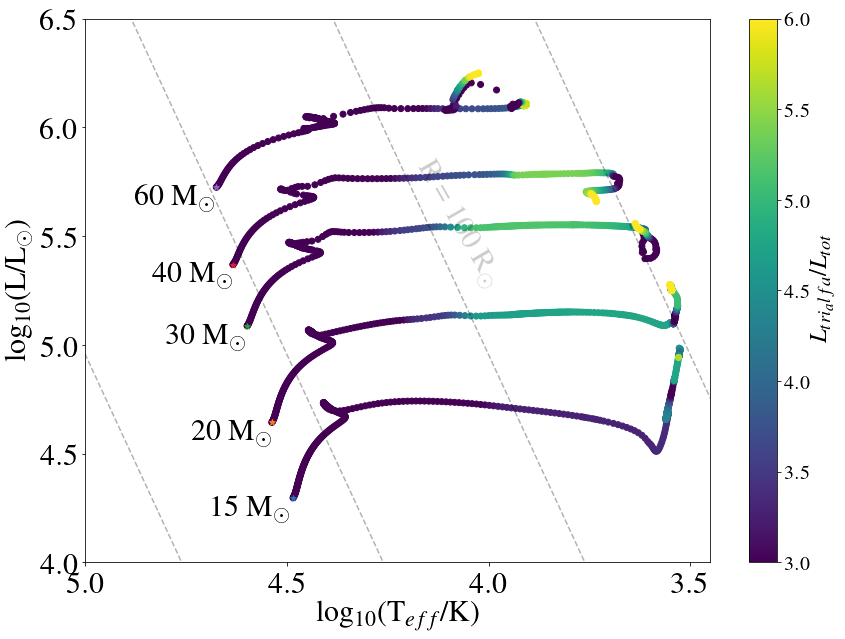

In [ ]:
# make plot
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =3, VMAX = 6, Lfrac = False,
           colour_by = 'log_LHe', colour_label = '$L_{tri_alfa}$/$L_{tot}$')

## Now we'll show it per dominating Luminosity

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
ColorSet = plt.cm.Set2(np.linspace(0,1,8)) #3rd num is the number of colours Set2
# colors = ColorSet[0:4]
colors = [ColorSet[0],ColorSet[1],ColorSet[3],ColorSet[2]] # switch last 2 colors
newcmp = ListedColormap(colors)

#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0, Ldominant = True,
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/'):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.699)
        hist = hist[ZAMS_i:]
        #Express the luminosity as a fraction of the total luminosity
        if Ldominant:
            L_dominant = np.argmax([10**hist['log_LH']/10**hist['log_L'], 10**hist['log_LHe']/10**hist['log_L'],\
                                    10**hist['log_LZ']/10**hist['log_L'], np.full(len(hist),0.5) ], axis = 0 )
            hist['L_dominant'] = L_dominant
            kleur = 'L_dominant'
        ##plot lines
        scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= hist_names[i],
                c = hist[kleur], vmin= VMIN, vmax = VMAX, cmap = newcmp)
        ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
        ax.text(hist['log_Teff'][0],  hist['log_L'][0] , hist_names[i], ha='right', va='top') #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-60, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    c_ticks = ['$L_H$', '$L_{He}$', '$L_{Z}$', 'Not clear']
    cb = fig.colorbar(scat, ax=ax, ticks =range(4))
    #plt.clim(-0.5, 3 - 0.5) #set the tick labels in the middle, BEFORE changing labels! (done with vmin,vmax)
    cb.ax.set_yticklabels(c_ticks) 
#     cb.set_label(colour_by.replace('_', ' '), size = 25)
#     cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=25)
    
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
#     plt.legend( )
    plt.savefig(save_loc +'/HR_'+colour_by+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




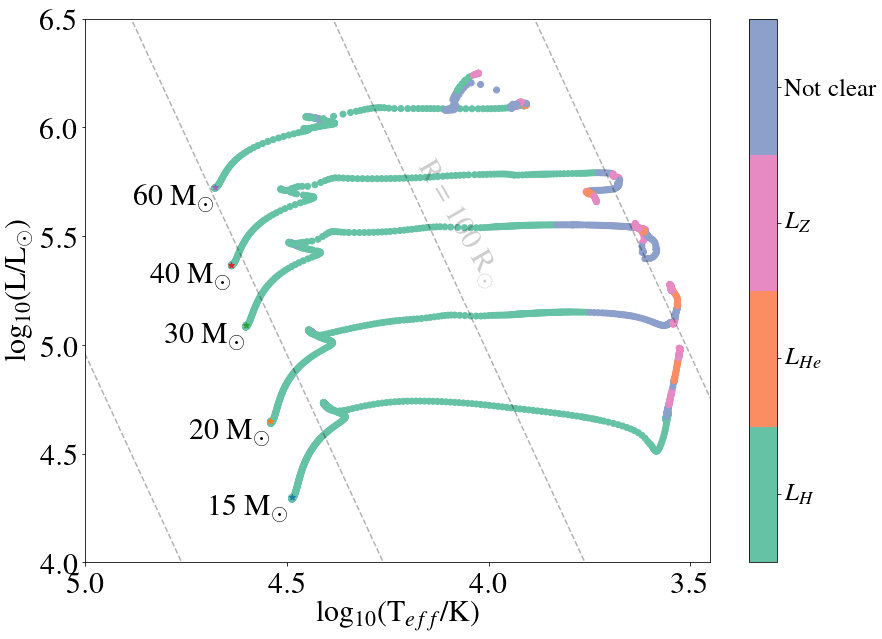

In [ ]:
HR_diagram(histoy_list, xlim = (3.45,5.), ylim= (4.,6.5), VMIN =-0.5, VMAX = 3.5, Ldominant = True,
           colour_by = 'L_dominant', colour_label = '$L_{Z}$/$L_{tot}$')

*** 
# Problem 2a Stellar winds

In [ ]:
#read data
history15_Dutch = Table.read(proj_dir +'/hw4_models/M15_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history20_Dutch = Table.read(proj_dir +'/hw4_models/M20_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history30_Dutch = Table.read(proj_dir +'/hw4_models/M30_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history40_Dutch = Table.read(proj_dir +'/hw4_models/M40_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')
history60_Dutch = Table.read(proj_dir +'/hw4_models/M60_HW4_Dutch/history.data',format='csv',header_start = 4, data_start=5, delimiter = ' ')


history15_Dutch.info()



<Table length=838>
         name           dtype 
---------------------- -------
          model_number   int64
             num_zones   int64
              star_age float64
                log_dt float64
             star_mass float64
            log_xmstar float64
          log_abs_mdot float64
        mass_conv_core float64
          conv_mx1_top float64
          conv_mx1_bot float64
          conv_mx2_top float64
          conv_mx2_bot float64
               mx1_top float64
               mx1_bot float64
               mx2_top float64
               mx2_bot float64
                log_LH float64
               log_LHe float64
                log_LZ float64
              log_Lnuc float64
    log_Lnuc_sub_log_L float64
                    pp float64
                   cno float64
              tri_alfa float64
            epsnuc_M_1 float64
            epsnuc_M_2 float64
            epsnuc_M_3 float64
            epsnuc_M_4 float64
            epsnuc_M_5 float64
            epsnuc_M

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = plt.cm.plasma(np.linspace(0,1,15)) #3rd num is the number of colours Set2
newcmp = ListedColormap(colors)


#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0, 
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/',
              label_list = ['None']):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
    
        ##plot lines
        if i == 0:
            scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= label_list[i],
                    c = hist[kleur], vmin= VMIN, vmax = VMAX, cmap = newcmp, zorder = 20)
            ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
            ax.text(hist['log_Teff'][0],  hist['log_L'][0] , np.str(np.round(hist['star_mass'][0],0))+'M$_{\odot}$' , ha='right', va='top') #log_Teff
        else: #for no winds
            ax.plot(hist['log_Teff'],  hist['log_L'], label= label_list[i],
                    color = 'grey', lw = 7,ls='--', zorder=21, alpha = 0.75) #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-80, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    cb = fig.colorbar(scat, ax=ax)
    cb.set_label(colour_by.replace('_', ' '), size = 25)
    cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=25)
    
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
    plt.legend(loc = 'upper left')
    plt.savefig(save_loc +'/HR_'+colour_by+np.str(np.round(hist['star_mass'][0],0))+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




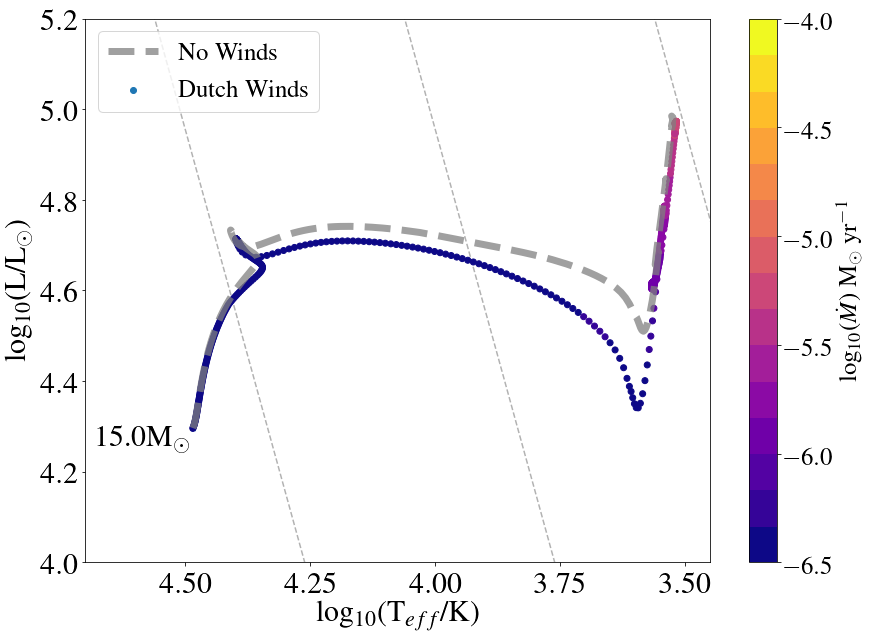

In [ ]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history15_Dutch, history15], xlim = (3.45,4.7), ylim= (4.,5.2), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)



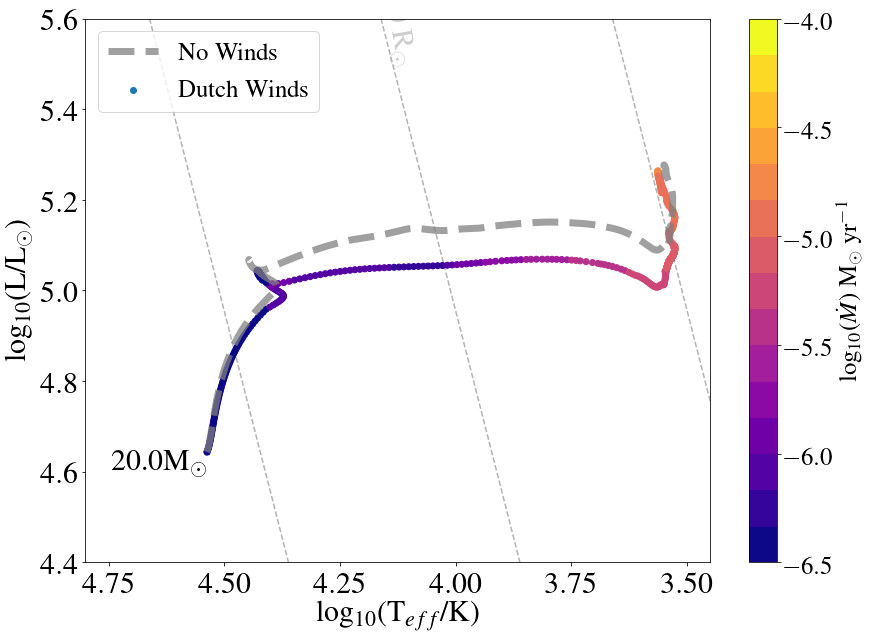

In [ ]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history20_Dutch, history20], xlim = (3.45,4.8), ylim= (4.4,5.6), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


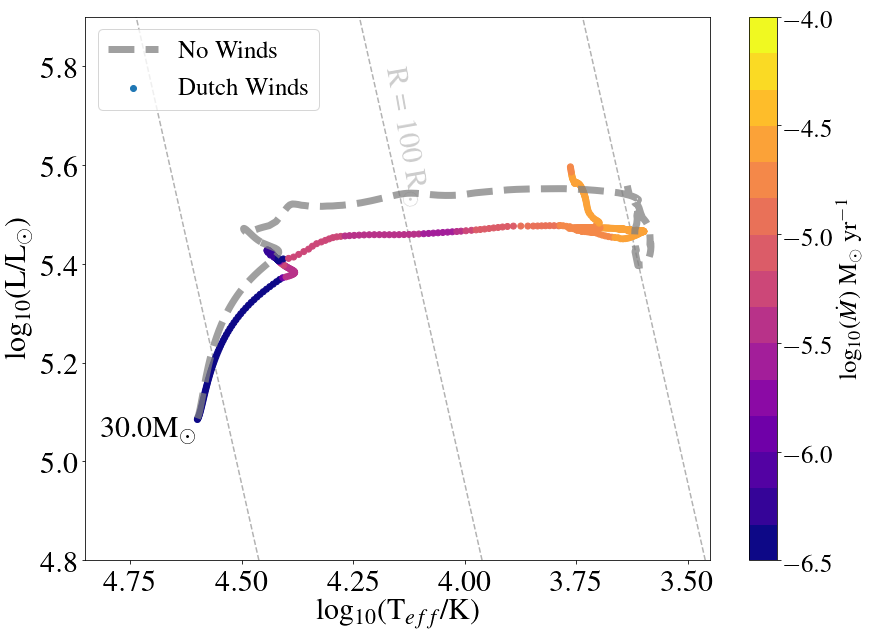

In [ ]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history30_Dutch, history30], xlim = (3.45,4.85), ylim= (4.8,5.9), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


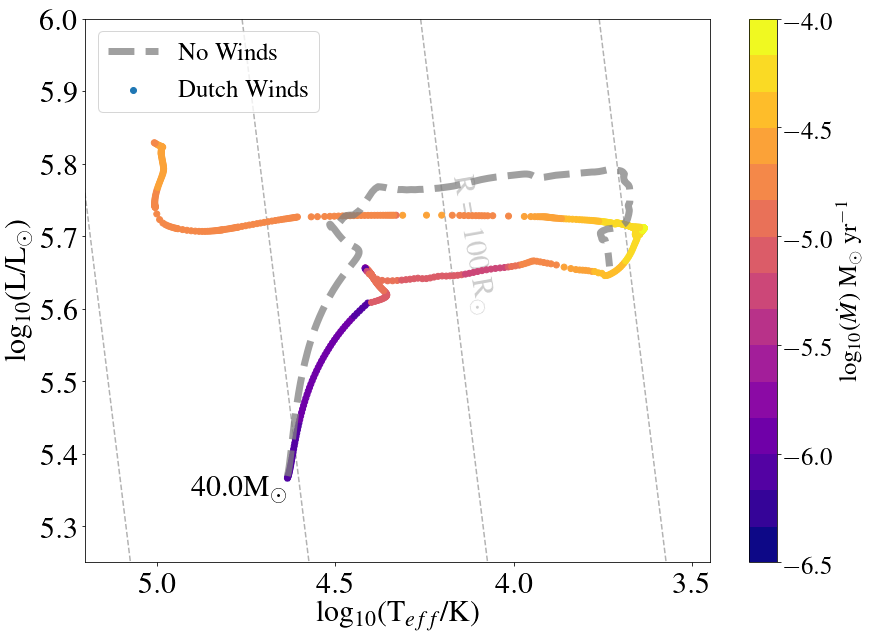

In [ ]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history40_Dutch, history40], xlim = (3.45,5.2), ylim= (5.25,6.0), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


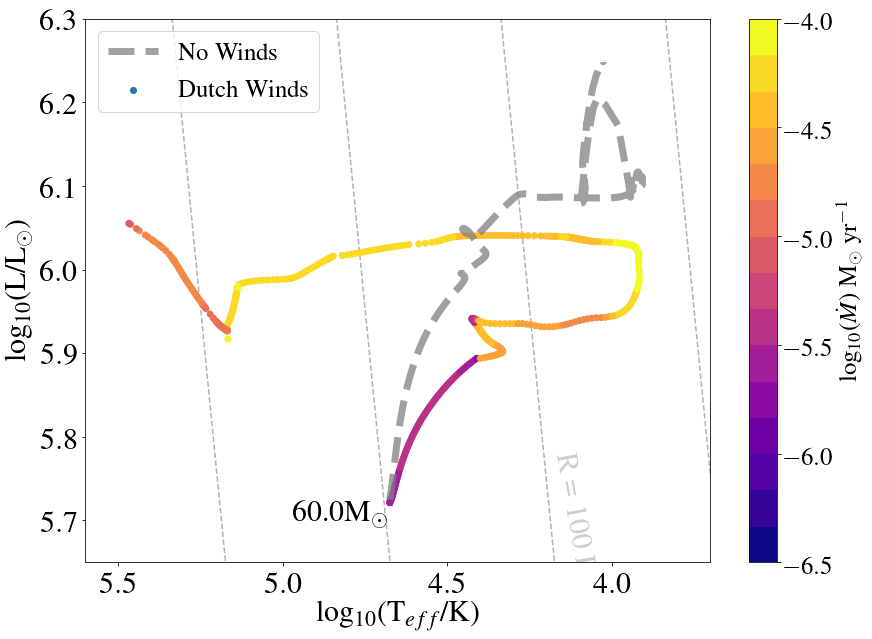

In [ ]:
labels   = ['Dutch Winds', 'No Winds']
HR_diagram([history60_Dutch, history60], xlim = (3.7,5.6), ylim= (5.65,6.3), VMIN =-6.5, VMAX = -4,
           colour_by = 'log_abs_mdot', colour_label = 'log$_{10}$($\dot{M}$) M$_{\odot}$ yr$^{-1}$', label_list = labels)


# Problem 2b Surface abundances

In [ ]:
history60_Dutch.info()

<Table length=763>
         name           dtype 
---------------------- -------
          model_number   int64
             num_zones   int64
              star_age float64
                log_dt float64
             star_mass float64
            log_xmstar float64
          log_abs_mdot float64
        mass_conv_core float64
          conv_mx1_top float64
          conv_mx1_bot float64
          conv_mx2_top float64
          conv_mx2_bot float64
               mx1_top float64
               mx1_bot float64
               mx2_top float64
               mx2_bot float64
                log_LH float64
               log_LHe float64
                log_LZ float64
              log_Lnuc float64
    log_Lnuc_sub_log_L float64
                    pp float64
                   cno float64
              tri_alfa float64
            epsnuc_M_1 float64
            epsnuc_M_2 float64
            epsnuc_M_3 float64
            epsnuc_M_4 float64
            epsnuc_M_5 float64
            epsnuc_M

In [ ]:
def plot_abundance_time(histoy_list, abund = 'surface_he4', ylab = 'He 4'):
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
        
        plt.plot(hist['star_age']/hist['star_age'][-1], hist[abund], 
                 label = np.str(np.round(hist['star_mass'][0],0))+'M$_{\odot}$')

    # Plot values
    ax.set_xlabel('fraction of star age to $^{12}$C exhaustion')
    ax.set_ylabel('surface abundance ' + ylab)
    plt.tick_params(axis='both', which='major')
    plt.xlim(0.8, 1.0)
#     plt.ylim(ylim)
    plt.yscale('log')

    plt.legend( )
    plt.savefig(save_loc +'/surfaceAbund'+abund+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()


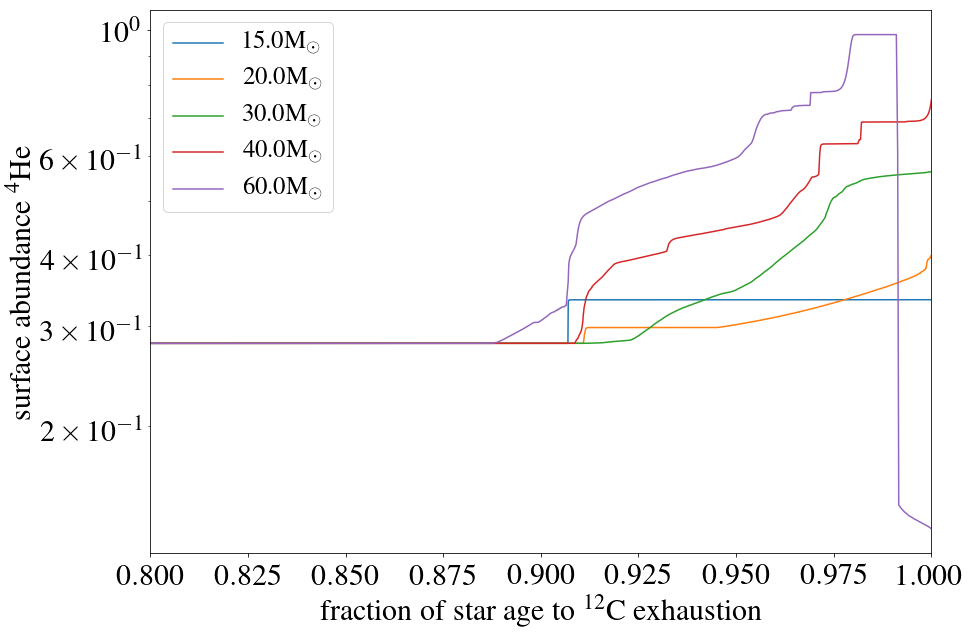

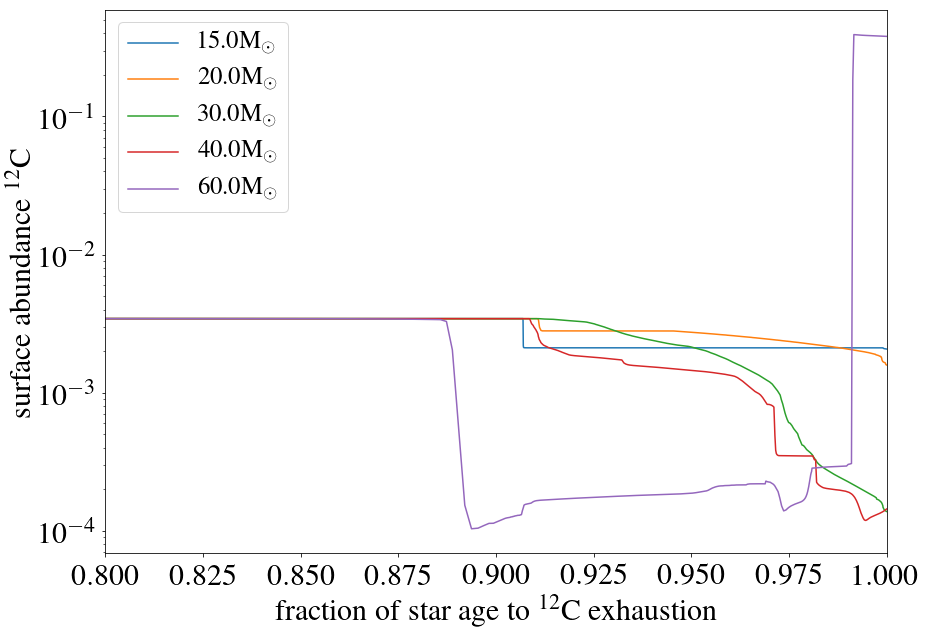

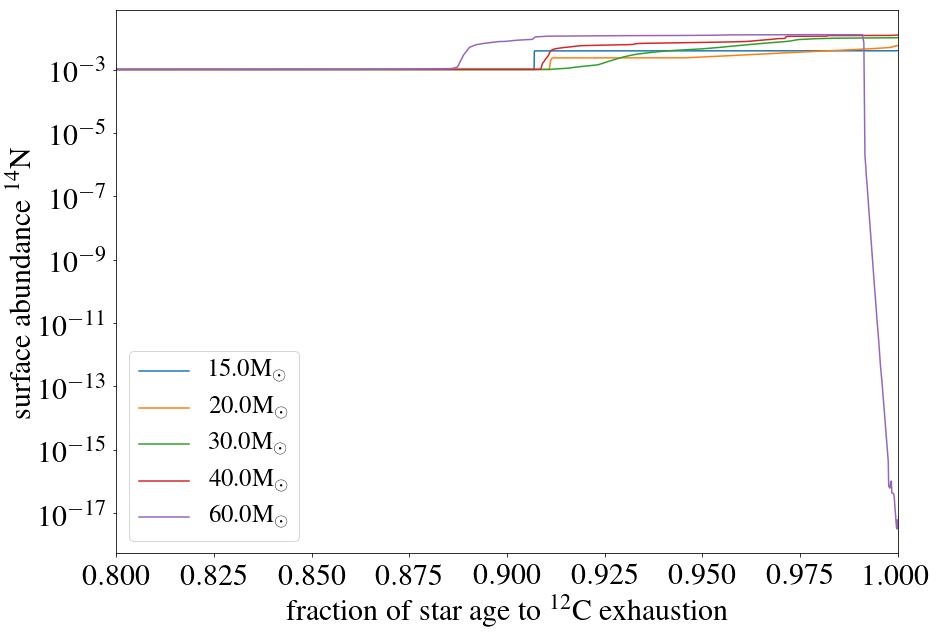

In [ ]:
plot_abundance_time(histoy_list, abund = 'surface_he4', ylab = '$^{4}$He')
plot_abundance_time(histoy_list, abund = 'surface_c12', ylab = '$^{12}$C')
plot_abundance_time(histoy_list, abund = 'surface_n14', ylab = '$^{14}$N')

In [ ]:

#Plot the HR diagram with different colour values
def HR_diagram(histoy_list, xlim = (None, None), ylim = (None,None),  VMIN =-3, VMAX = 0,
               colour_by = 'center_h1', colour_label = 'kleur',save_loc = proj_dir + '/hw4sol/plots/'):
    
    kleur = colour_by
    ###############
    ### start Figure
    fig, ax = plt.subplots(figsize=(14,10))
        
    ###############
    for i, hist in enumerate(histoy_list):
        ## Remove pre-MS
        # find index of first occurence of center_h < 70 (= primordial )
        ZAMS_i = next(ind for ind,x in enumerate(hist['center_h1']) if x < 0.69)
        hist = hist[ZAMS_i:]
        
        #Extra column
        hist['N_C'] = hist['surface_n14']/hist['surface_c12']
            
        ##plot lines
        scat = ax.scatter(hist['log_Teff'],  hist['log_L'] , label= hist_names[i],
                c = hist[kleur], vmin= VMIN, vmax = VMAX)
        ax.scatter(hist['log_Teff'][0],  hist['log_L'][0] , marker = '*') #log_Teff
        ax.text(hist['log_Teff'][0],  hist['log_L'][0] , hist_names[i], ha='right', va='top') #log_Teff

    ###############
    ### Add lines of constant radii
    log_Ts = np.arange(min(hist['log_Teff'])-2, max(hist['log_Teff'])+2, 0.1) #Array of log temperature values
    for i, logr in enumerate([-1,0,1,2,3]): #Loop over radii
        ax.plot(log_Ts, const_Rlines(log_Ts, logr), c='k', alpha = 0.3, linestyle='--')
        # Plot text
        ax.text(4.2, const_Rlines(4.2, logr), 'R = '+ str(np.round( 10**logr,2) ) +' R$_{\odot}$',
                 rotation=-60, alpha = 0.2).set_clip_on(True)
     
    #colorbar
    cb = fig.colorbar(scat, ax=ax)
    cb.set_label(colour_by.replace('_', ' '), size = 25)
    cb.set_label(colour_label, size = 25)
    cb.ax.tick_params(labelsize=20)
    
    # Show WR region
    WR_i1 = next(ind for ind,x in enumerate(history40_Dutch['surface_h1']) if x < 0.3)
    WR_i2 = next(ind for ind,x in enumerate(history60_Dutch['surface_h1']) if x < 0.3)
    T_array = np.linspace(history40_Dutch['log_Teff'][WR_i1]+0.05, 4., num =50)

    dx = history40_Dutch['log_Teff'][WR_i1] - history60_Dutch['log_Teff'][WR_i2]
    dy = history40_Dutch['log_L'][WR_i1] - history60_Dutch['log_L'][WR_i2]
    y_line = (dy/dx)*T_array + 16
    plt.plot(T_array, y_line , c = 'pink')
    plt.fill_between(x = T_array, y1 =y_line, y2 = 7,zorder = 0,
                     color='r',alpha=0.1,edgecolor='blue',hatch='/', lw = 0)
    plt.fill_between(x = np.linspace(6,history40_Dutch['log_Teff'][WR_i1]+0.05),zorder = 0,
                     y1 =y_line[0], y2 = 7,color='r',alpha=0.1,edgecolor='blue',hatch='/', lw = 0.0)
    
    
    # Plot values
    ax.set_ylabel('log$_{10}$(L/L$_{\odot}$)')
    ax.set_xlabel('log$_{10}$(T$_{eff}$/K)')
    plt.tick_params(axis='both', which='major')
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().invert_xaxis()    
#     plt.legend( )
    plt.savefig(save_loc +'/HR_'+colour_by+'.png', bbox_inches='tight')    
    plt.show()
    plt.close()




In [ ]:
histoy_list = [history15_Dutch, history20_Dutch, history30_Dutch, history40_Dutch, history60_Dutch]
HistNameList   = ['15 M$_{\odot}$', '20 M$_{\odot}$', '30 M$_{\odot}$', '40 M$_{\odot}$', '60 M$_{\odot}$']
colors = plt.cm.plasma(np.linspace(0,1,4)) #3rd num is the number of colours Set2

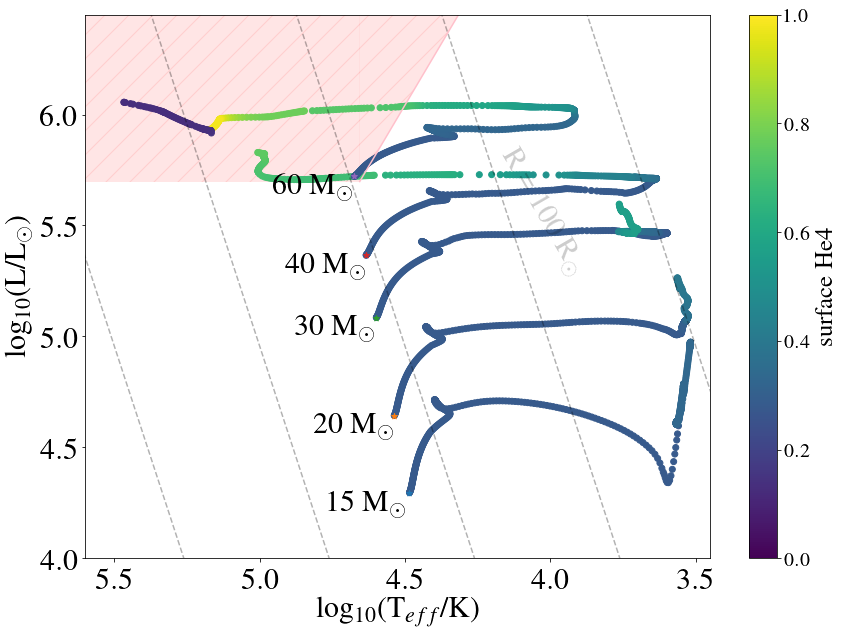

In [ ]:
# He
HR_diagram(histoy_list, xlim = (3.45,5.6), ylim= (4.,6.45), VMIN =0, VMAX = 1,
           colour_by = 'surface_he4', colour_label = 'surface He4')

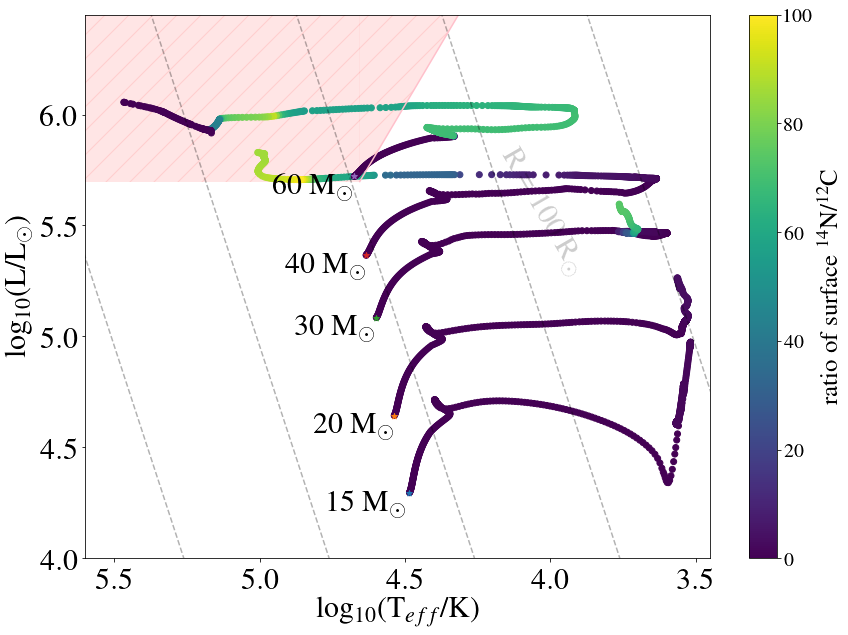

In [ ]:
# ratio Nitrogen over Carbon
HR_diagram(histoy_list, xlim = (3.45,5.6), ylim= (4.,6.45), VMIN =0, VMAX = 100,
           colour_by = 'N_C', colour_label = 'ratio of surface $^{14}$N/$^{12}$C')

# surface_h1 < 0.3


# 3 Evolution of massive stars with mass loss

In [62]:
# Read in the new data for our higher mass star with mass loss
M50_DSF1_hist_data = mr.MesaData('data/M50_overshoot0_DSF1p0/LOGS/history.data')
M50_DSF05_hist_data = mr.MesaData('data/M50_overshoot0_DSF0p5/LOGS/history.data')
M50_DSF01_hist_data = mr.MesaData('data/M50_overshoot0_DSF0p1/LOGS/history.data')

print(M50_DSF1_hist_data.bulk_names)

('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'mix_type_1', 'mix_qtop_1', 'mix_type_2', 'mix_qtop_2', 'mix_type_3', 'mix_qtop_3', 'mix_type_4', 'mix_qtop_4', 'mix_type_5', 'mix_qtop_5', 'mix_type_6', 'mix_qtop_6', 'mix_type_7', 'mix_qtop_7', 'mix_type_8', 'mix_qtop_8', 'mix_type_9', 'mix_qtop_9', 'mix_type_10', 'mix_qtop_10', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alfa', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'burn_type_1', 'burn_qtop_1', 'burn_type_2', 'burn_qtop_2', 'burn_type_3', 'burn_qtop_3', 'burn_type_4', 'burn_qtop_4', 'burn_type_5', 'burn_qtop_5', 'burn_type_6', 'burn_qtop_6', 'burn_type_7', 'burn_qtop_7', 'burn_type_8', 'burn_qtop_8', 'burn_type_9', 'burn_qtop_9', 'burn_type_10', 'burn_qtop_10', 'he_core_mass',

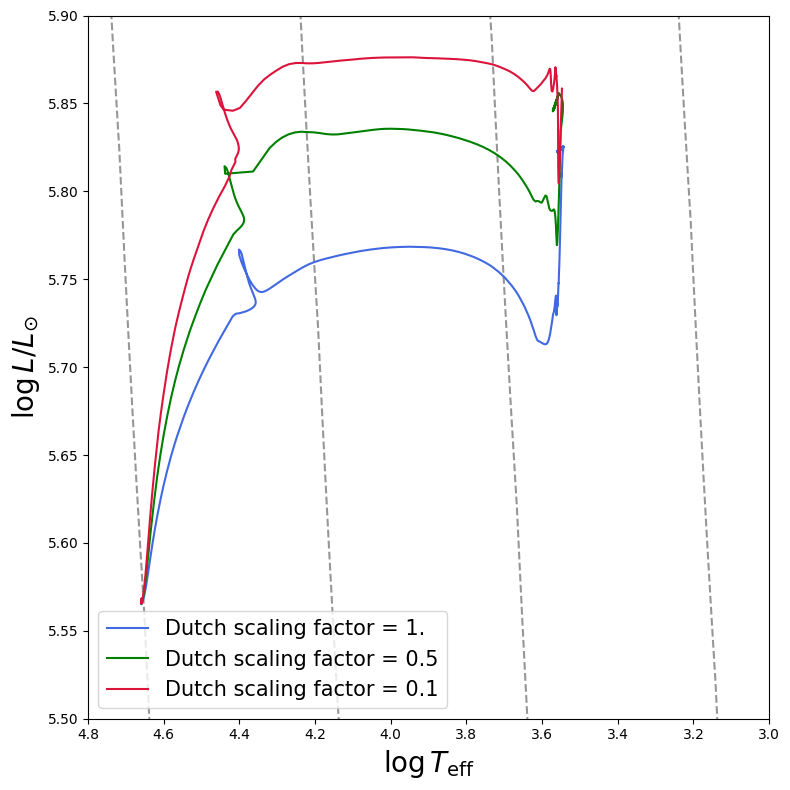

In [63]:
plot_HR_with_radius_contours(list_of_hist_data = [M50_DSF1_hist_data, M50_DSF05_hist_data, M50_DSF01_hist_data],
                            label_list = ['Dutch scaling factor = 1.', 'Dutch scaling factor = 0.5', 'Dutch scaling factor = 0.1'],
                            save_path='plots/M50_HR_diagram_winds.png',
                            xlim=(4.8, 3), ylim=(5.5, 5.9)
                            )



### Helium abundance versus stellar age

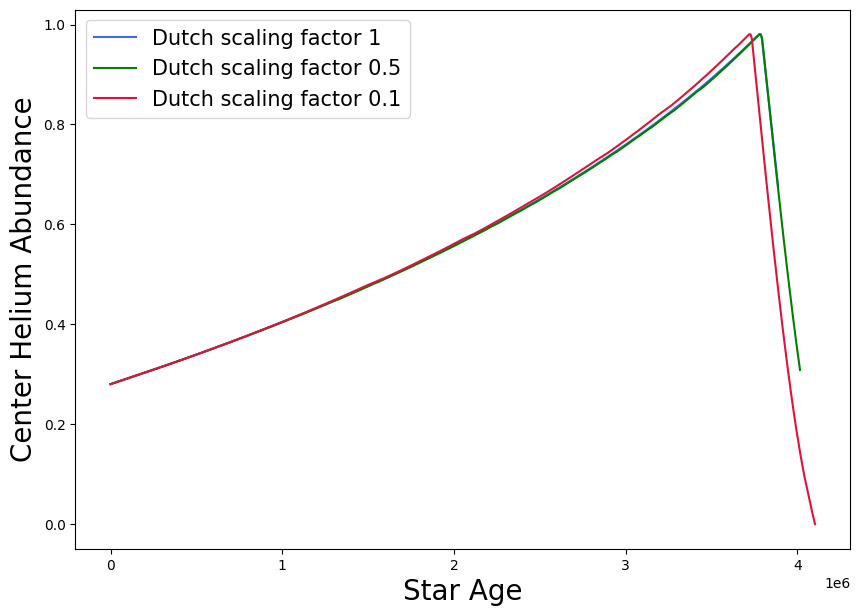

In [64]:
fig, ax = plt.subplots(figsize = (10,7))

##########
# Select the data to plot
for histdata, label, colors in zip([M50_DSF1_hist_data, M50_DSF05_hist_data, M50_DSF01_hist_data],
                                 ['Dutch scaling factor 1', 'Dutch scaling factor 0.5', 'Dutch scaling factor 0.1'],
                                 ['royalblue', 'green', 'crimson']):
    plt.plot(histdata.star_age, histdata.center_he4, label = label, color = colors)

# 'log_center_T', 'log_center_Rho',
plt.legend(fontsize = 15)
plt.xlabel("Star Age", fontsize = 20 )
plt.ylabel("Center Helium Abundance", fontsize = 20 )
plt.savefig('plots/M50_central_He.png', bbox_inches = 'tight')
plt.show()

Core properties didn't change much when changing the winds (which is an external thing!)

### Plot surface abundances

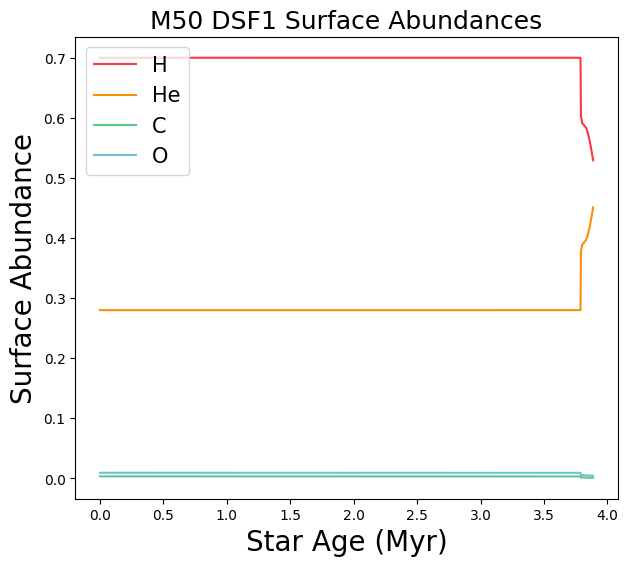

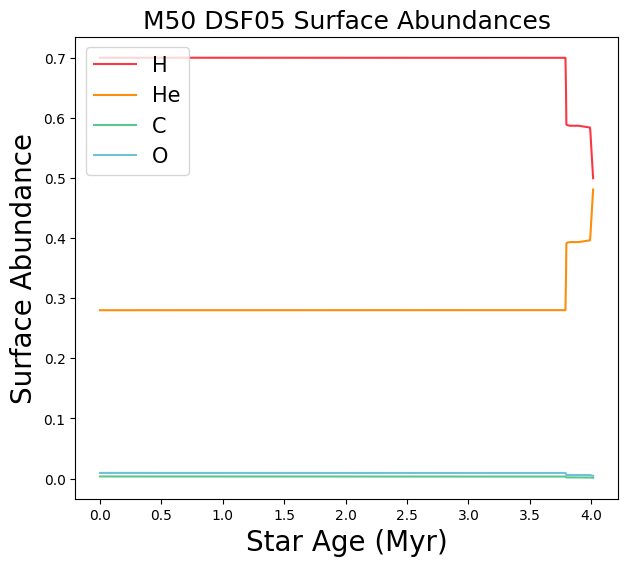

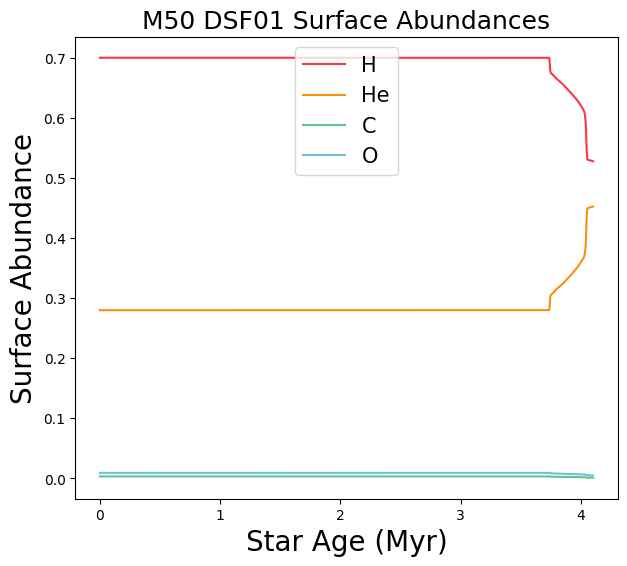

In [65]:
def plot_surface_abundances(histdata, var_name = 'DSF05'):
    fig, ax = plt.subplots(figsize = (7,6))

    ##########
    # Select the data to plot
    plt.plot(histdata.star_age*1e-6, histdata.surface_h1, label = 'H', color = '#FB3743')
    plt.plot(histdata.star_age*1e-6, histdata.surface_he4, label = 'He', color = '#FB8E0C')
    plt.plot(histdata.star_age*1e-6, histdata.surface_c12, label = 'C', color = '#5CC68E')
    plt.plot(histdata.star_age*1e-6, histdata.surface_o16, label = 'O', color = '#71C1D6')

    plt.title(f"M50 {var_name} Surface Abundances", fontsize = 18)
    plt.legend(fontsize = 15)
    plt.xlabel("Star Age (Myr)", fontsize = 20 )
    plt.ylabel("Surface Abundance", fontsize = 20 )
    plt.savefig(f'plots/M50_{var_name}_surface_abundances.png', bbox_inches = 'tight')
    plt.show()

plot_surface_abundances(M50_DSF1_hist_data, var_name='DSF1')
plot_surface_abundances(M50_DSF05_hist_data, var_name='DSF05')
plot_surface_abundances(M50_DSF01_hist_data, var_name='DSF01')



Surface abundances change much more when you change the winds! I.e. with stronger winds, the stars become less H rich and more He rich in their envelope. 

### Extra: abundance profile beyond core He exhaust:

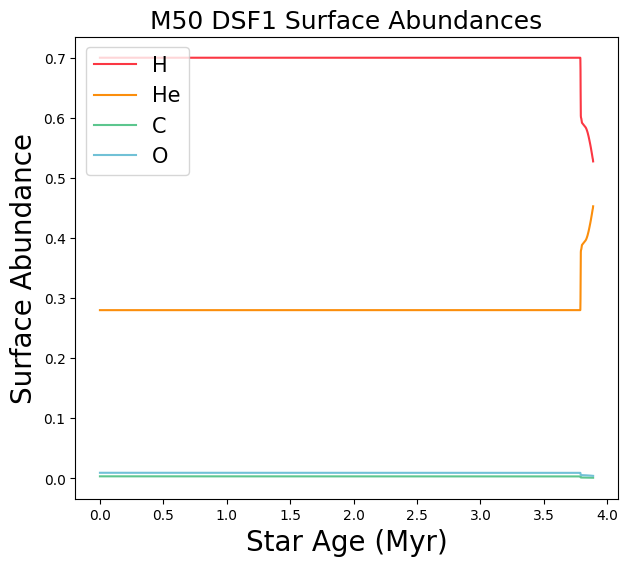

In [66]:
# Re-read in to load the newest data
M50_DSF1_hist_data = mr.MesaData('data/M50_overshoot0_DSF1p0/LOGS/history.data')

# Plot it
plot_surface_abundances(M50_DSF1_hist_data, var_name='DSF1')
